In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv (r'Survey_144.csv')   
df = pd.DataFrame(data, columns= ['answer'])

In [2]:
print(df)

                                                 answer
0                                                   NaN
1                                                   NaN
2                                                   NaN
3     Concerning question #84 I haven't the slightes...
4     After the war I hope we Americans will have a ...
...                                                 ...
2354  The army is unfair in permitting local customs...
2355  We feel that Service men should be considered ...
2356  Just give me a chance to do the thing I feel I...
2357  I hope we don't have another depression and I ...
2358                                                NaN

[2359 rows x 1 columns]


In [3]:
sentences = []

i = 0
for index, row in df.iterrows():
    if(df.iloc[i]['answer'] is not np.nan):
        sentences.append(df.iloc[i]['answer'])
    i = i+1
                     

In [4]:
print(len(sentences))

2247


In [5]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

C:\Users\bapad\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
length = len(sentences)
myList = []
sentence_embeddings = model.encode(sentences)

In [7]:
myHm = np.zeros((length,length))

for i in range(0,length):
    for j in range(0,length):
        myHm[i,j] = (cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0])


In [8]:
print(myHm)
print(len(myHm))

[[0.99999994 0.59341788 0.63287807 ... 0.44262016 0.51026678 0.57775247]
 [0.59341788 1.00000012 0.75662839 ... 0.55485499 0.21410108 0.60277641]
 [0.63287807 0.75662839 0.9999997  ... 0.68922293 0.35923439 0.71429533]
 ...
 [0.44262016 0.55485499 0.68922293 ... 1.00000012 0.36291659 0.6566512 ]
 [0.51026678 0.21410108 0.35923439 ... 0.36291659 1.         0.4603222 ]
 [0.57775247 0.60277641 0.71429533 ... 0.6566512  0.4603222  1.        ]]
2247


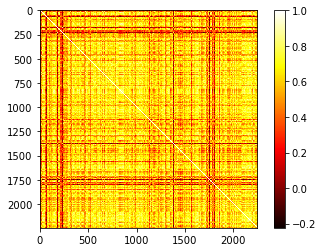

In [9]:
import matplotlib.pyplot as plt
plt.imshow(myHm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [10]:
smLen = 20
smaller = np.zeros((smLen, smLen))

for i in range(0,smLen):
    for j in range(0,smLen):
        smaller[i,j] = (cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0])

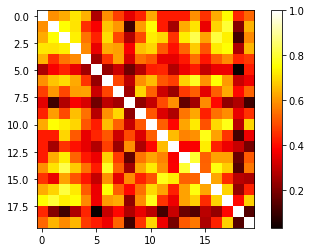

In [11]:
plt.imshow(smaller, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [12]:
bigLen = 100
bigger = np.zeros((bigLen, bigLen))

for i in range(0, bigLen):
    for j in range(0,bigLen):
        bigger[i,j] = (cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0])

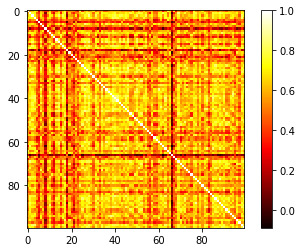

In [13]:
plt.imshow(bigger, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

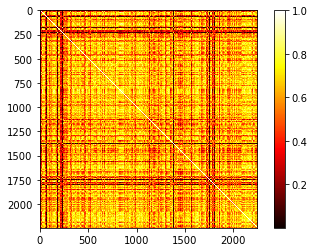

In [14]:
absHm = np.absolute(myHm)
rowSums = absHm.sum(axis = 1)

plt.imshow(absHm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [15]:
print(rowSums)

[1208.50862109 1480.74803011 1448.07336134 ... 1155.22615738  750.44358143
 1260.67298427]


## Private Hokie Response

In [16]:
#PHR = (A - n) / (n^2 - n)


n = len(rowSums)
PHR = (rowSums - np.amin(rowSums) )/ (np.amax(rowSums) - np.amin(rowSums))

In [17]:
sortedPHR = np.sort(PHR)
print(len(sortedPHR))

2247


In [18]:
arLen = len(sortedPHR)


Text(0, 0.5, 'PHR normalized')

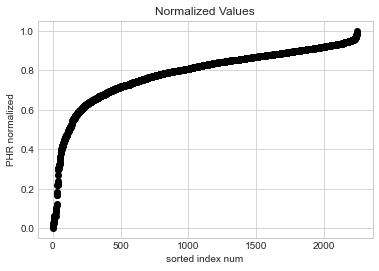

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(range(arLen), sortedPHR, 'o', color='black');
plt.title("Normalized Values")
plt.xlabel('sorted index num')
plt.ylabel('PHR normalized')

In [20]:
newCol = np.arange(arLen)
#all_data = np.append(PHR, newCol)
combined = np.vstack((PHR, newCol)).T
print(combined.shape)

print(combined)

(2247, 2)
[[7.14229638e-01 0.00000000e+00]
 [9.12223962e-01 1.00000000e+00]
 [8.88460323e-01 2.00000000e+00]
 ...
 [6.75478359e-01 2.24400000e+03]
 [3.81088019e-01 2.24500000e+03]
 [7.52167745e-01 2.24600000e+03]]


In [21]:
sortedPHR = combined[combined[:,0].argsort()]

print(sortedPHR[2,0])

0.01017824597628272


In [22]:
print(PHR)

[0.71422964 0.91222396 0.88846032 ... 0.67547836 0.38108802 0.75216775]


Text(0, 0.5, 'PHR normalized')

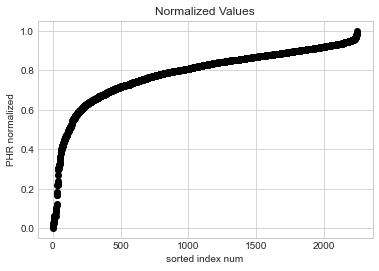

In [23]:
plt.style.use('seaborn-whitegrid')

plt.plot(range(arLen), sortedPHR[:,0], 'o', color='black');
plt.title("Normalized Values")
plt.xlabel('sorted index num')
plt.ylabel('PHR normalized')

## first 34 mixture of no comment/ single word responses/ illegible responses

In [24]:
for k in range(0,33):
    print(sentences[int(sortedPHR[k,1])])

No.
Nothing -
Nothing
none
[insertion] [/insertion]
See question # 96
Nothing to say.
I have nothing to say.
I have nothing to say.
Every thing is all right with me.
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
[unclear] [/unclear]
I haven't anything to say.
No haven't anything to say
None - Not much need.
Just a little more thinking.
None - They are useless.
I don't think I have nothing on that subject.
I have no comments to make.
I don't guess I have anything to say.
Because I could rest very easy
I have nothing else to say.
just be glad when it over
don't have someone home
I'll wait and see
I do not like my


## Checking around the curve

In [58]:
for k in range(351,2000):
    print(sentences[int(sortedPHR[k,1])])

What I have to say is that no [strikethrough] Negro family should be sent to a southern Army camp or Jim Crow camp. An the one I am at now [unclear] [/unclear] it in Camp Gordon Ga [Georgia] a Negro has no privileges at all regardless to what it is he is hidden from the rest of the world.
Stop the Jim Crow in the South and give the poor peoples a [unclear] ???? [/unclear]
I joined the Enlisted Reserve Corps and took 6 months training in radio and was under the impression that when I was called to active duty I would be assigned to a signal corps outfit, but instead after completing basic training I was put in an Aviation Engineer unit as a basic (521) unloading and reloading box cars. I've practically forgotten everything I learned about radios now after being in the Army over a year and not having the opportunity to attend any radio school or be assigned to the Signal Corps. I've been promised that I would be sent to radio school at three different post, but it never materialized. I'm

## Last 5 responses

In [26]:
for k in range(arLen - 6,arLen):
    print(sentences[int(sortedPHR[k,1])])
    print("\n")

My opinion of things after the war are I think after the war living conditions for our race will be better, there will be better Jobs that we may secure. And too after the war the people will not stand for Other people walking over them as before. I think there will be more equal rights. We will all so take advantage of all opportunities ofered moreso than before. As for the Army Regulations they are made for all But in Most Cases it seems as though the colored Race is neglected, and something is added or either something taken away and there fore All the Soldiers are not treated the same. As for this camp Here it sees as thought the peoples here don't want the colored raced here and on the other hand they still continue to send them here. I thinlk if all the soldiers were treated the samegiven the same opportunities the army would be would be much better than it is now.


I just hope that the Negros get and [an] even break after this mess is over with -- Educational & Socially industr

In [27]:
#print(int(sortedPHR[2246,1]))
print(arLen)

2247


In [30]:
length = len(sentences)
splitted = np.zeros(length)

for i in range(0, length):
    s = sentences[i]
    splitted[i] = len(s.split())
#print(len(splitted)) ## LENGTH IS SAME AS SENTENCES
print(splitted)

[ 25.  77. 118. ...  26.  19.  36.]


In [29]:
for k in range(34,135):
    print(sentences[int(sortedPHR[k,1])])

May God bless us all
I feel that I was treated right. I have no complaints to make as a whole I am satisfied.
Well I dont have any thing to say because I am undecided
In general things are O.K. I just haven't got anything to say.
I'll be mighty glad when it's over
Frankly I'd rather not say it.
Equal rights ride any peace or train are bus
Let America be Free!!!
I want to be free and treated as such
Mother my Baby my wife
I am not interested in nothing. This is not my life to live.
I have been down here in Camp P[unclear] New Orleans 12 L.A. [unclear] [/unclear]
I would like to get a good job.
well it is ok Because every soilder have a Chance if he just used it.
I would like to see the [unclear] [/unclear] condition change
The Army has been very educational to a certain extent.
I just want to get home soon.
I think Depression will follow after a number of years
I hope it is soon over and we will do it.
I THINK THAT THE GENERAL SITUATION OF MY COMMENT CAN BE CAPITULATED UNDER QUESTION 79

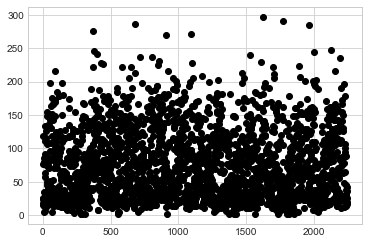

In [32]:
plt.style.use('seaborn-whitegrid')

plt.plot(range(arLen), splitted, 'o', color='black');

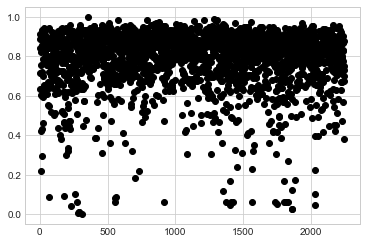

In [31]:
plt.style.use('seaborn-whitegrid')

plt.plot(range(arLen), PHR, 'o', color='black');

In [46]:
firstCircle = np.zeros(33)
for k in range(0,33):
    firstCircle[k] = splitted[int(sortedPHR[k,1])]
second = np.zeros(247)
for k in range(247):
    second[k] = splitted[int(sortedPHR[2000 + k,1])]

2.0


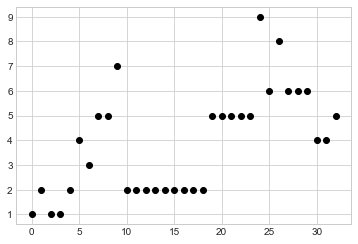

In [47]:
plt.style.use('seaborn-whitegrid')

plt.plot(range(33), firstCircle, 'o', color='black');

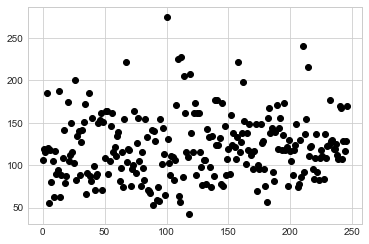

In [48]:
plt.style.use('seaborn-whitegrid')

plt.plot(range(247), second, 'o', color='black');

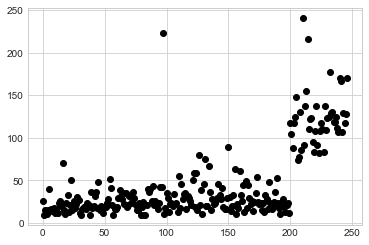

In [52]:
aroundCurve = np.zeros(200)
for k in range(200):
    aroundCurve[k] = splitted[int(sortedPHR[150 + k,1])]
   
plt.style.use('seaborn-whitegrid')
plt.plot(range(200), second, 'o', color='black');

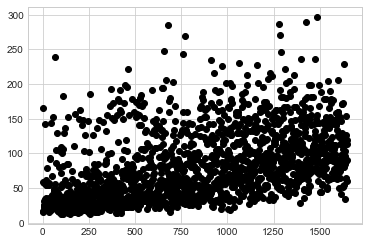

In [54]:
INNER = np.zeros(1650)
for k in range(1650):
    INNER[k] = splitted[int(sortedPHR[350 + k,1])]
   
plt.style.use('seaborn-whitegrid')
plt.plot(range(1650), INNER, 'o', color='black');

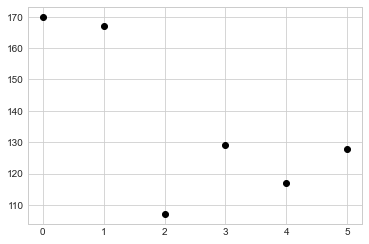

In [55]:
final = np.zeros(6)
for k in range(6):
    final[k] = splitted[int(sortedPHR[2240 + k,1])]
   
plt.style.use('seaborn-whitegrid')
plt.plot(range(6), final, 'o', color='black');

In [57]:
get_sum = sum(PHR) 
mean = get_sum / len(PHR)
print(mean)

0.7852381658342318
